In [1]:
from scipy.io import loadmat
import numpy as  np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=loadmat("thyroidTrain")

In [3]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Feb 05 00:00:06 2001',
 '__version__': '1.0',
 '__globals__': [],
 'trainThyroidInput': array([[0.28   , 0.     , 1.     , ..., 0.179  , 0.155  , 0.115  ],
        [0.45   , 0.     , 0.     , ..., 0.144  , 0.099  , 0.14516],
        [0.77   , 0.     , 0.     , ..., 0.111  , 0.096  , 0.115  ],
        ...,
        [0.57   , 0.     , 0.     , ..., 0.067  , 0.096  , 0.07   ],
        [0.26   , 0.     , 0.     , ..., 0.022  , 0.138  , 0.016  ],
        [0.29   , 0.     , 0.     , ..., 0.142  , 0.177  , 0.08   ]]),
 'trainThyroidOutput': array([[0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        ...,
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1]], dtype=uint8),
 'testThyroidInput': array([[0.73   , 0.     , 0.     , ..., 0.173  , 0.1    , 0.173  ],
        [0.6    , 0.     , 0.     , ..., 0.087  , 0.069  , 0.126  ],
        [0.79   , 1.     , 0.     , ..., 0.162  , 0.078  , 0.209  ],
        ...,
        [

In [4]:
X=pd.DataFrame(data['trainThyroidInput'])
y=pd.DataFrame(data['trainThyroidOutput'])

In [5]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.28,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00250,0.0260,0.179,0.155,0.11500
1,0.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00002,0.0140,0.144,0.099,0.14516
2,0.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.00189,0.0180,0.111,0.096,0.11500
3,0.72,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00040,0.0206,0.186,0.124,0.15000
4,0.78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00290,0.0170,0.104,0.076,0.13700


In [6]:
y1=[]
l=[]
a=0
b=0
c=0
for i in range(len(y)):
    if (y.iloc[i,0]==1) and (y.iloc[i,1]==0) and (y.iloc[i,2]==0):
        #print("vbksab")
        a+=1
        y1.append(0)
    elif((y.iloc[i,0]==0) and (y.iloc[i,1]==1) and (y.iloc[i,2]==0)):
        #print("vbksab")
        b+=1
        y1.append(1)
    elif((y.iloc[i,0]==0) and (y.iloc[i,1]==0) and (y.iloc[i,2]==1)):
        c+=1
        y1.append(2)
        if(c>=200):
            l.append(i)
print(a,b,c)

113 260 4627


In [7]:
y1=pd.DataFrame(y1)

y1=pd.DataFrame(y1)
X=X.drop(l)
y1=y1.drop(l)


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y1,test_size=0.2)

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca=PCA(n_components=5)
x_train=pca.fit_transform(x_train)
x_test=pca.fit_transform(x_test)

In [11]:
x1=x_train

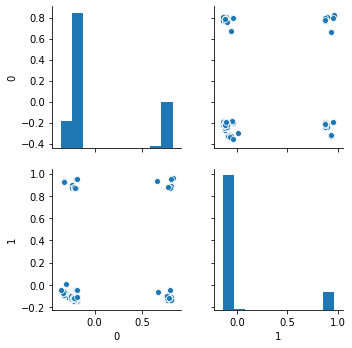

In [12]:
u=pd.DataFrame(x_train[:,:2])
sns.pairplot(u)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
min_max=MinMaxScaler()
x_train=min_max.fit_transform(x_train)
x_test=min_max.fit_transform(x_test)

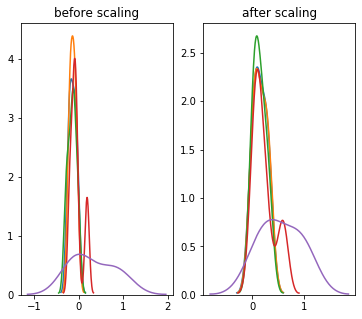

In [15]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(6,5))
ax1.set_title("before scaling")
sns.kdeplot(x1[0],ax=ax1)
sns.kdeplot(x1[1],ax=ax1)
sns.kdeplot(x1[2],ax=ax1)
sns.kdeplot(x1[3],ax=ax1)
sns.kdeplot(x1[4],ax=ax1)

ax2.set_title("after scaling")
sns.kdeplot(x_train[0],ax=ax2)
sns.kdeplot(x_train[1],ax=ax2)
sns.kdeplot(x_train[2],ax=ax2)
sns.kdeplot(x_train[3],ax=ax2)
sns.kdeplot(x_train[4],ax=ax2)


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
parameters=[{'C':[1,10,100,1000],'kernel':['linear']},
           {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search=GridSearchCV(SVC(),param_grid=parameters,cv=10)

In [17]:
#grid_search.fit(x_train,y_train)
#SVC().get_params().keys()

In [18]:
grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [20]:
models=[]
models.append(("LR",LogisticRegression()))
models.append(("knn",KNeighborsClassifier()))
models.append(("SVC",SVC(C=1,gamma=0.1,kernel='rbf')))
models.append(("decission tree",DecisionTreeClassifier()))
models.append(("RandomForestClassifier",RandomForestClassifier()))
result=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=10,random_state=7)
    cv_results=cross_val_score(model,x_train,y_train[0],cv=kfold,scoring="accuracy")
    result.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

LR:0.505507(0.075291)
knn:0.442077(0.064970)
SVC:0.514203(0.068856)
decission tree:0.520531(0.083250)
RandomForestClassifier:0.516232(0.058526)


In [21]:
from sklearn.metrics import accuracy_score
accuracy=[]
y1=y_train.iloc[:,0]
u=range(1,30)
for i in range(1,30):
    knn1=KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_train,y_train)
    y_pred=knn1.predict(x_test)
    accuracy.append(accuracy_score(y_test,y_pred))

Text(0, 0.5, 'accuracy')

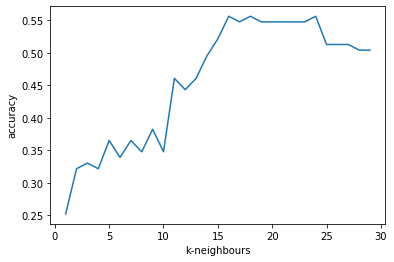

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(u,accuracy)
plt.xlabel("k-neighbours")
plt.ylabel("accuracy")

In [23]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)


In [24]:
y_test.shape

(115, 1)

In [25]:
from sklearn.metrics import classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.3652173913043478
              precision    recall  f1-score   support

           0       0.13      0.16      0.15        25
           1       0.49      0.38      0.43        50
           2       0.41      0.47      0.44        40

    accuracy                           0.37       115
   macro avg       0.34      0.34      0.34       115
weighted avg       0.38      0.37      0.37       115



In [26]:
y_pred_train=KNN.predict(x_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.56      0.41      0.47        88
           1       0.60      0.85      0.71       210
           2       0.68      0.42      0.52       159

    accuracy                           0.61       457
   macro avg       0.62      0.56      0.57       457
weighted avg       0.62      0.61      0.60       457



In [27]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
y_pred_decision_tree=decision_tree.predict(x_test)

In [28]:
print(accuracy_score(y_test,y_pred_decision_tree))
print(classification_report(y_test,y_pred_decision_tree))

0.3217391304347826
              precision    recall  f1-score   support

           0       0.20      0.08      0.11        25
           1       0.22      0.04      0.07        50
           2       0.34      0.82      0.49        40

    accuracy                           0.32       115
   macro avg       0.26      0.32      0.22       115
weighted avg       0.26      0.32      0.22       115



In [29]:
randomforest=RandomForestClassifier()
randomforest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
y_pred_random=randomforest.predict(x_test)

In [31]:
print(accuracy_score(y_test,y_pred_random))

0.4


In [32]:
print(classification_report(y_test,y_pred_random))

              precision    recall  f1-score   support

           0       0.14      0.04      0.06        25
           1       0.57      0.26      0.36        50
           2       0.38      0.80      0.51        40

    accuracy                           0.40       115
   macro avg       0.36      0.37      0.31       115
weighted avg       0.41      0.40      0.35       115



In [33]:
import keras
from keras.models import Sequential

Using TensorFlow backend.


In [34]:
from keras.layers import Dense

In [35]:
clasifier=Sequential()

In [36]:
clasifier.add(Dense(output_dim=5,init='uniform',activation='relu',input_dim=21))

In [37]:
#clasifier.add(Dense(output_dim=5,init='uniform',activation='relu',input_dim=5))

In [38]:
#clasifier.add(Dense(output_dim=5,init='uniform',activation='relu',input_dim=5))

In [39]:
# clasifier.add(Dense(output_dim = 3, init = 'uniform', activation = 'softmax'))
clasifier.add(Dense(3, init = 'uniform', activation = 'softmax'))

In [40]:
clasifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [41]:
X1=pd.DataFrame(data['trainThyroidInput'])
Y=pd.DataFrame(data['trainThyroidOutput'])

In [42]:
clasifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 110       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
Total params: 128
Trainable params: 128
Non-trainable params: 0
_________________________________________________________________


In [43]:
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST=train_test_split(X1,Y,test_size=0.2)

In [44]:
print(X_TRAIN.shape,Y_TRAIN.shape)

(4000, 21) (4000, 3)


In [45]:
data['trainThyroidOutput'].shape

(5000, 3)

In [46]:
Y_TRAIN

,0,1,2
3060,0,0,1
2451,0,0,1
367,0,0,1
2958,0,0,1
4982,0,0,1
...,...,...,...
3977,0,0,1
349,0,0,1
744,1,0,0
3822,0,0,1


In [47]:
clasifier.fit(X_TRAIN,Y_TRAIN,batch_size=10,nb_epoch=10)

Epoch 1/10
4000/4000 [==============================] - 1s 229us/step - loss: 0.6335 - accuracy: 0.9222
Epoch 2/10
4000/4000 [==============================] - 1s 149us/step - loss: 0.3014 - accuracy: 0.9247
Epoch 3/10
4000/4000 [==============================] - 1s 161us/step - loss: 0.2932 - accuracy: 0.9247
Epoch 4/10
4000/4000 [==============================] - 1s 161us/step - loss: 0.2863 - accuracy: 0.9247
Epoch 5/10
4000/4000 [==============================] - 1s 161us/step - loss: 0.2785 - accuracy: 0.9247
Epoch 6/10
4000/4000 [==============================] - 1s 172us/step - loss: 0.2702 - accuracy: 0.9255
Epoch 7/10
4000/4000 [==============================] - 1s 163us/step - loss: 0.2624 - accuracy: 0.9265
Epoch 8/10
4000/4000 [==============================] - 1s 179us/step - loss: 0.2556 - accuracy: 0.9273
Epoch 9/10
4000/4000 [==============================] - 1s 161us/step - loss: 0.2489 - accuracy: 0.9280
Epoch 10/10
4000/4000 [==============================] - 1s 160u

In [48]:
y_predict_ann=clasifier.predict(X_TEST)

In [49]:
y_predict_ann

array([[0.03061313, 0.08113144, 0.88825536],
       [0.01299251, 0.04618064, 0.9408269 ],
       [0.0041687 , 0.02388451, 0.9719468 ],
       ...,
       [0.02826886, 0.07862841, 0.8931027 ],
       [0.02864921, 0.0781448 , 0.893206  ],
       [0.00676997, 0.03232837, 0.9609017 ]], dtype=float32)

In [50]:
from scipy import stats
c=y_predict_ann[:,0]
print(stats.mode(y_predict_ann))

ModeResult(mode=array([[0.01640836, 0.05651538, 0.9270763 ]], dtype=float32), count=array([[3, 3, 3]]))


In [51]:
(min(y_predict_ann[:,0])+max(y_predict_ann[:,0]))/2

0.15837088227272034

In [52]:
(min(y_predict_ann[:,1])+max(y_predict_ann[:,1]))/2

0.13583585619926453

In [53]:
min(y_predict_ann[:,2]),max(y_predict_ann[:,2])

(0.4190957, 0.9978387)

In [54]:
y_predict_ann[:,0]=(y_predict_ann[:,0]>=0.134)
y_predict_ann[:,1]=(y_predict_ann[:,1]>=0.133)
y_predict_ann=(y_predict_ann>=0.9)

In [55]:
print(classification_report(Y_TEST,y_predict_ann))

              precision    recall  f1-score   support

           0       0.69      0.50      0.58        18
           1       0.23      0.13      0.16        54
           2       0.97      0.89      0.93       928

   micro avg       0.94      0.84      0.89      1000
   macro avg       0.63      0.51      0.56      1000
weighted avg       0.92      0.84      0.88      1000
 samples avg       0.83      0.84      0.84      1000



In [56]:
y_predict_ann_train=clasifier.predict(X_TRAIN)

In [57]:
y_predict_ann_train[:,0]=(y_predict_ann_train[:,0]>=0.133)
y_predict_ann_train[:,1]=(y_predict_ann_train[:,1]>=0.137)
y_predict_ann_train[:,2]=(y_predict_ann_train[:,2]>=0.9)

In [58]:
print(classification_report(Y_TRAIN,y_predict_ann_train))

              precision    recall  f1-score   support

           0       0.87      0.61      0.72        95
           1       0.16      0.10      0.12       206
           2       0.97      0.87      0.92      3699

   micro avg       0.93      0.82      0.88      4000
   macro avg       0.66      0.53      0.59      4000
weighted avg       0.92      0.82      0.87      4000
 samples avg       0.82      0.82      0.82      4000

